In [23]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
import matplotlib.pyplot as plt

## Исходные данные

In [24]:
np.random.seed(42)
X = stats.chi2.rvs(5, size=300)
np.random.seed(41)
Y = stats.chi2.rvs(5, size=300)

m_x = 5
m_y = 5
var_x = 10
var_y = 10

In [25]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_s = np.var(X, ddof = 1)
Y_s = np.var(Y, ddof = 1)

## Визуальное представление выборки

<AxesSubplot: title={'center': 'Гистограмма с 25 NBins'}>

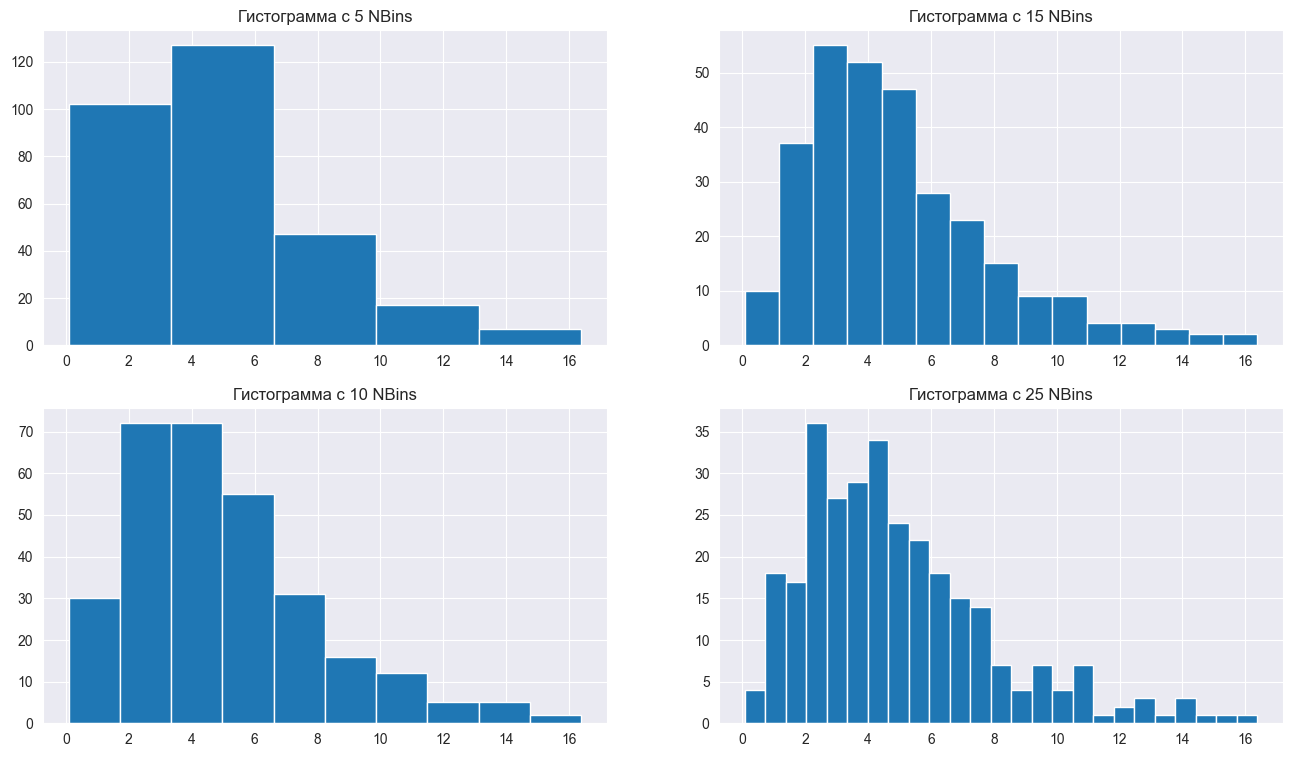

In [26]:
def plot_hist(array, ax, bins_num: int):
    ax.hist(array, bins = bins_num)
    ax.set_title(f'Гистограмма с {bins_num} NBins')
    return ax

fig, ax = plt.subplots(2, 2, figsize = (16, 9))
plot_hist(X, ax[0,0], 5)
plot_hist(X, ax[1,0], 10)
plot_hist(X, ax[0,1], 15)
plot_hist(X, ax[1,1], 25)

## Критерий хи-квадрат

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [27]:
m = np.mean(X)
d = np.var(X, ddof = 0)
bins_number = int(2*X.shape[0]**(1/3))

In [28]:
def chisquare_normal(dist, m, d, bins, ddof=1):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [29]:
bins = 15
chisquare_normal(X, m, d, bins_number)

(355.2653714136592, 0.0)

### Статистическая гипотеза: $ H_0: X \sim R $

In [55]:
def chisquare_uniform(dist, bins=15, ddof=1):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.uniform.cdf(bins1[1:], min(dist), max(dist)) - stats.uniform.cdf(bins1[:-1], min(dist), max(dist))) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [56]:
chisquare_uniform(X, 15)

(259.09731213834266, 0.0)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [32]:
def chisquare_chi2(dist, bins=15, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.chi2.cdf(bins1[1:], 5) - stats.chi2.cdf(bins1[:-1], 5)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [33]:
chisquare_chi2(X)

(7.583555440254576, 0.9098749784242924)

## Критерий Колмогорова

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [34]:
stats.kstest(X, 'norm')

KstestResult(statistic=0.8656114766857894, pvalue=1.742093756287311e-261)

### Статистическая гипотеза: $ H_0: X \sim R $

In [35]:
stats.kstest(X, 'uniform')

KstestResult(statistic=0.9733333333333334, pvalue=0.0)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [52]:
stats.kstest(X, lambda x: stats.chi2.cdf(x, 5))

KstestResult(statistic=0.17794206976770327, pvalue=8.8194904709693e-09)

## Двухвыборочные критерии 

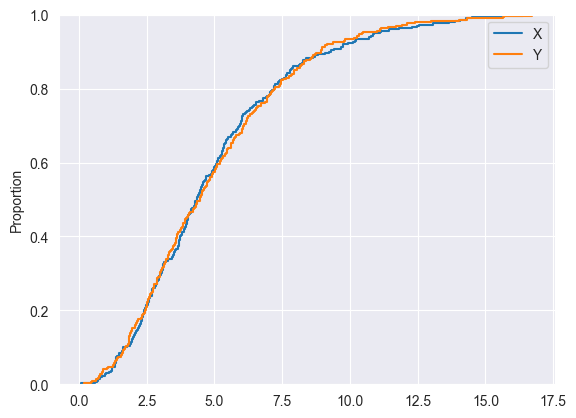

In [37]:
import seaborn as sns

sns.ecdfplot(x = X)
sns.ecdfplot(x = Y)
plt.xlabel = 'values'
plt.legend(labels=['X', 'Y'])
plt.show()

<AxesSubplot: ylabel='Count'>

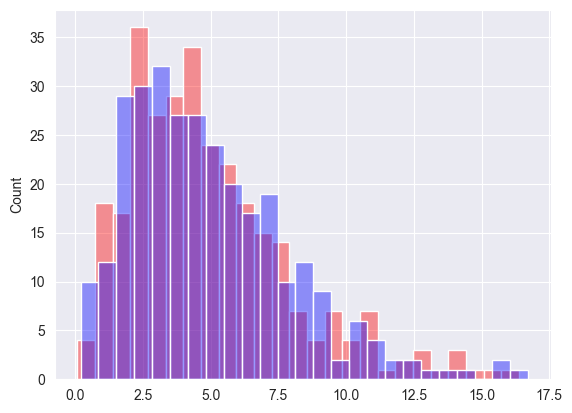

In [38]:
sns.histplot(X, bins = 25, color='red', alpha =0.4)
sns.histplot(Y, bins = 25, color = 'blue', alpha = 0.4)

In [39]:
def two_sample_chisquare(dist1, dist2, bins=15):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)
    

Peasrson $ {\chi}^2 $ test

In [40]:
two_sample_chisquare(X, Y)

(0.28402625966642164, 0.8676098648383117)

Kolmogorov-Smirnov test

In [41]:
stats.ks_2samp(X, Y)

KstestResult(statistic=0.04666666666666667, pvalue=0.9003231885744891)

Sign-test


In [42]:
sign_test(X, Y)

(3.0, 0.7728865430906029)

U-test

In [43]:
stats.ranksums(X, Y)

RanksumsResult(statistic=-0.02543465739900956, pvalue=0.9797082674362879)